# F20DL Lab 3

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas dataframe
ds = pd.read_csv("./datasets/Dry_Bean_Dataset.csv")

## New Datasets from Original Dataset

In [3]:
from sklearn.feature_selection import r_regression, SelectKBest

data = ds[ds.columns.difference(["Class", "MajorAxisLength"])]
target = ds["MajorAxisLength"]

print(r_regression(data, target))    # Pearson's r coefficient for all features against MajorAxisLength

[ 0.93183359  0.55033477 -0.56837707  0.93260701  0.54197162  0.96173336
 -0.07806191  0.82605155  0.97733775 -0.77360867 -0.85923764 -0.5681848
 -0.48252718 -0.28430228 -0.59635758]


In [4]:
# Dataset 1 - 2 features, 1 class
ds1Est = SelectKBest(r_regression, k=2)    # Estimator for selecting most correlated features
ds1Est.fit(data, target)
ds1Features = ds1Est.get_feature_names_out()
ds1Features    # Selected attributes

array(['EquivDiameter', 'Perimeter'], dtype=object)

In [5]:
# Dataset 2 - 4 features, 1 class
ds2Est = SelectKBest(r_regression, k=4)    # Estimator for selecting most correlated features
ds2Est.fit(data, target)
ds2Features = ds2Est.get_feature_names_out()
ds2Features    # Selected attributes

array(['Area', 'ConvexArea', 'EquivDiameter', 'Perimeter'], dtype=object)

In [6]:
# Dataset 3 - 6 features, 1 class
ds3Est = SelectKBest(r_regression, k=6)    # Estimator for selecting most correlated features
ds3Est.fit(data, target)
ds3Features = ds3Est.get_feature_names_out()
ds3Features    # Selected attributes

array(['Area', 'AspectRation', 'ConvexArea', 'EquivDiameter',
       'MinorAxisLength', 'Perimeter'], dtype=object)

In [7]:
ds1 = ds1Est.transform(data)
ds2 = ds2Est.transform(data)
ds3 = ds3Est.transform(data)

## Saving New Datasets

In [8]:
ds1DF = pd.DataFrame(data=ds1, columns=ds1Features)
ds2DF = pd.DataFrame(data=ds2, columns=ds2Features)
ds3DF = pd.DataFrame(data=ds3, columns=ds3Features)
ds1DF.head()

,EquivDiameter,Perimeter
0,190.141097,610.291
1,191.272751,638.018
2,193.410904,624.110
3,195.467062,645.884
4,195.896503,620.134


In [9]:
# Commented to avoid making duplicate saves when running
#ds1DF.to_csv("datasets/dataset1.csv", index=False)
#ds2DF.to_csv("datasets/dataset2.csv", index=False)
#ds3DF.to_csv("datasets/dataset3.csv", index=False)

## Classifier

In [10]:
ds0 = ds[ds.columns.difference(["Class"])]    # Original dataset without 'Class' attribute
target = ds["Class"]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)          # 3-nn classifier

In [12]:
from sklearn.model_selection import train_test_split

data_train0, data_test0, target_train0, target_test0 = train_test_split(ds0, target, random_state=6)    # Original

In [13]:
knn.fit(data_train0, target_train0)
prediction = knn.predict(data_test0)
knn.score(data_test0, target_test0)   # Original dataset

0.7202468410226271

Lab4 Part 2: 
Accuracy

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test0, prediction)

0.7202468410226271

Lab4 Part 2: 
TP

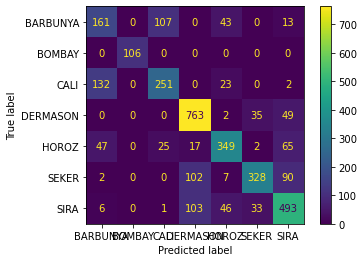

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(target_test0, prediction, labels=knn.classes_)

knn.fit(data_train0, target_train0)
prediction = knn.predict(data_test0)
knn.score(data_test0, target_test0)   # Original dataset

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [48]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

fp = 0
tp = 0

for i in range(7):
    fp+=FP[i]
    tp+=TP[i]

# True positive rate
TPR = tp/(tp+fn)
# False positive rate
FPR = fp/(fp+tn)

# Overall accuracy

(TPR, FPR)

(0.7202468410226271, 0.046625526496228815)

In [ ]:
#Lab 4 part 3

#Precision
precision = TP/(TP+FP)

#Recall
recall = TP/(TP+FN)

#F-measure
Fmeasure = (2 * recall * precision) / (recall + precision)

#Display
(precision, recall, Fmeasure)